In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [3]:
# Cargamos los datos 
# Cargar los datos desde la carpeta "raw"
data = pd.read_csv('C:/Users/lenovo/machine-learning-python-template/data/raw/Salary_dataset.csv')

# Mostrar las primeras filas para verificar que se haya cargado correctamente
print(data.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [4]:
# Eliminar la columna 'Unnamed: 0'
data.drop(columns=['Unnamed: 0'], inplace=True)

# Mostrar las primeras filas para verificar los cambios
print(data.head())

   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0


In [5]:
# Mostrar información estadística básica
print(data.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76004.000000
std           2.837888   27414.429785
min           1.200000   37732.000000
25%           3.300000   56721.750000
50%           4.800000   65238.000000
75%           7.800000  100545.750000
max          10.600000  122392.000000


In [6]:
# Verificar si hay datos faltantes o nulos
missing_data = data.isnull().sum()
print(missing_data)

YearsExperience    0
Salary             0
dtype: int64


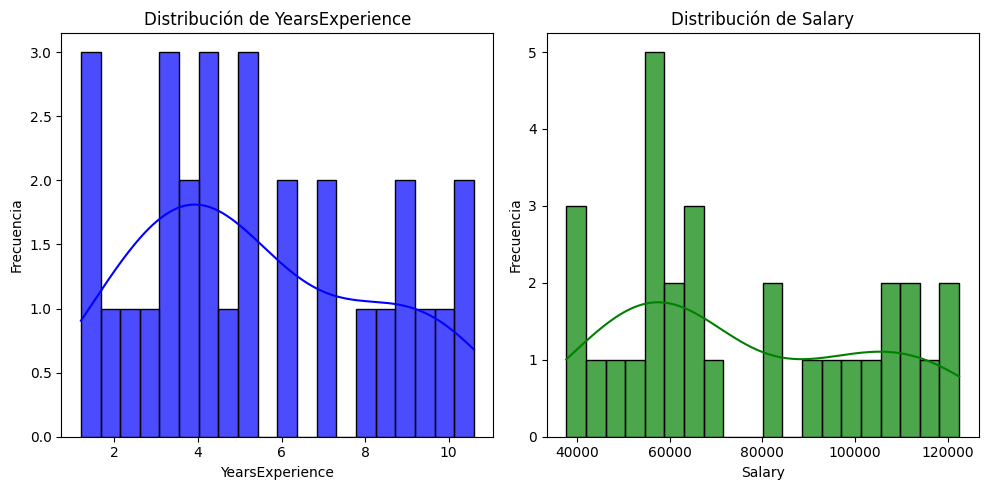

In [7]:
# Visualizar la distribución de la característica 'YearsExperience' y 'Salary' utilizando Seaborn
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['YearsExperience'], bins=20, color='blue', alpha=0.7, kde=True)
plt.title('Distribución de YearsExperience')
plt.xlabel('YearsExperience')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(data['Salary'], bins=20, color='green', alpha=0.7, kde=True)
plt.title('Distribución de Salary')
plt.xlabel('Salary')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [8]:
# Suponiendo que 'X' son las características y 'y' es la variable objetivo (en este caso, 'Salary')
X = data.drop(columns=['Salary'])  # Características
y = data['Salary']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% para entrenamiento y 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imprimir las formas de los conjuntos de entrenamiento y prueba para verificar
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train: (24, 1)
Forma de X_test: (6, 1)
Forma de y_train: (24,)
Forma de y_test: (6,)


In [9]:
# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo utilizando los conjuntos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 49830096.855908334


In [11]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

In [12]:
print("Predicciones\t Etiquetas reales")
for i in range(min(10, len(y_pred))):
    print(f"{y_pred[i]:.2f}\t\t {y_test.values[i]:.2f}")

Predicciones	 Etiquetas reales
115791.21		 112636.00
71499.28		 67939.00
102597.87		 113813.00
75268.80		 83089.00
55478.79		 64446.00
60190.70		 57190.00


In [13]:
from joblib import dump

# Guardar el modelo entrenado en la carpeta 'models'
dump(model, 'C:/Users/lenovo/machine-learning-python-template/models/modelo_salarios.joblib')

# Imprimir mensaje de confirmación
print("El modelo ha sido guardado correctamente en: C:/Users/lenovo/machine-learning-python-template/models/modelo_salarios.joblib")

El modelo ha sido guardado correctamente en: C:/Users/lenovo/machine-learning-python-template/models/modelo_salarios.joblib
